In [109]:
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

# import researchpy as rp

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.formula.api import ols

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats


### Read data 

In [2]:
df = pd.read_csv(r'C:\Users\SAI\Desktop\domain week\YALE-SPCOMP.csv')
df.head()

,Year,S&P Composite,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio
0,2019-12-31,3223.380000,NaN,NaN,257.139,1.91,3223.380000,NaN,NaN,30.913600
1,2019-11-30,3104.904500,NaN,NaN,257.208,1.81,3104.071562,NaN,NaN,29.911395
2,2019-10-31,2977.680000,NaN,NaN,257.346,1.71,2975.284860,NaN,NaN,28.840889
3,2019-09-30,2982.156000,57.220000,132.950000,256.759,1.70,2986.569552,57.304685,133.146764,29.229401
4,2019-08-31,2897.498182,56.839092,133.723333,256.558,1.63,2904.059842,56.967809,134.026163,28.705358


In [ ]:
df.shape

### Dropping unwanted columns

In [3]:
df=df.drop(columns='Year',axis=1)
df.head()

,S&P Composite,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio
0,3223.380000,NaN,NaN,257.139,1.91,3223.380000,NaN,NaN,30.913600
1,3104.904500,NaN,NaN,257.208,1.81,3104.071562,NaN,NaN,29.911395
2,2977.680000,NaN,NaN,257.346,1.71,2975.284860,NaN,NaN,28.840889
3,2982.156000,57.220000,132.950000,256.759,1.70,2986.569552,57.304685,133.146764,29.229401
4,2897.498182,56.839092,133.723333,256.558,1.63,2904.059842,56.967809,134.026163,28.705358


In [ ]:
df.info()

In [ ]:
df.describe()

### missing values

In [ ]:
df.isnull().sum()

In [4]:
df=df.dropna(axis=0).reset_index(drop=True)
df.head()

,S&P Composite,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio
0,2982.156000,57.220000,132.950000,256.759,1.70,2986.569552,57.304685,133.146764,29.229401
1,2897.498182,56.839092,133.723333,256.558,1.63,2904.059842,56.967809,134.026163,28.705358
2,2996.113636,56.458183,134.496667,256.571,1.63,3002.746469,56.583171,134.794417,29.986685
3,2890.170000,56.077275,135.270000,256.143,2.06,2901.408290,56.295329,135.795991,29.283796
4,2854.710000,55.698183,134.976667,256.092,2.40,2866.381124,55.925898,135.528502,29.242031


In [ ]:
df.shape

In [ ]:
df.isnull().sum()

### EDA

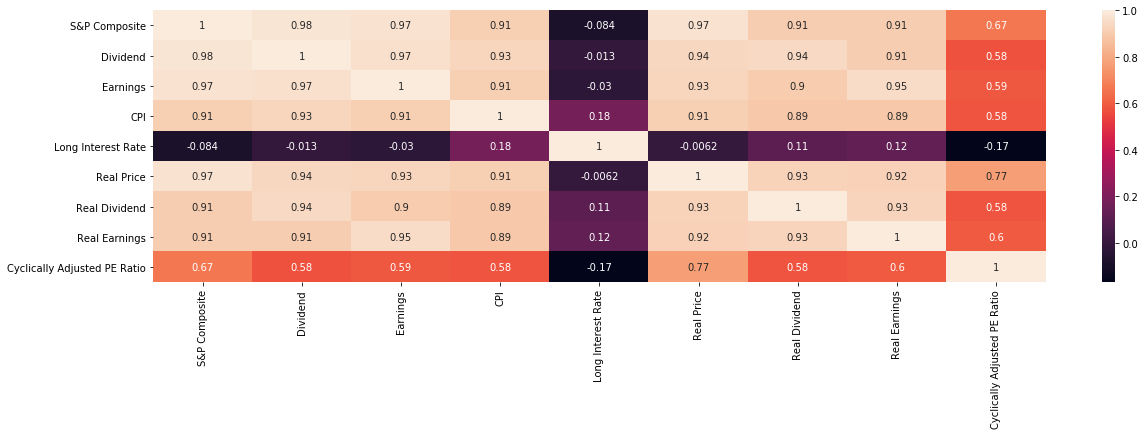

In [5]:
plt.subplots(figsize=(20,5))
cor= df.corr()
sns.heatmap(cor,annot=True)

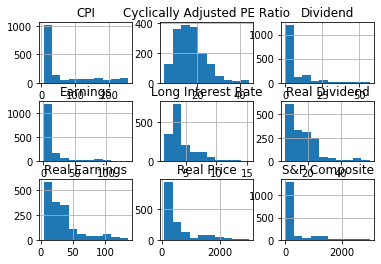

In [27]:
df.hist()
plt.show()

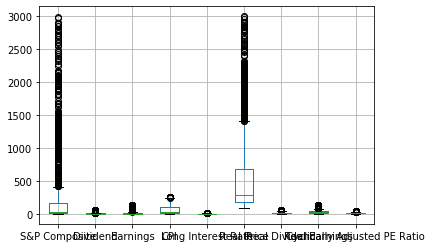

In [20]:
df.boxplot()

### log 

In [22]:
df_transform=df.apply(lambda x : np.log(x))
df_transform.head()

,S&P Composite,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio
0,8.000402,4.046903,4.889973,5.548138,0.530628,8.001881,4.048382,4.891452,3.375175
1,7.971603,4.040224,4.895773,5.547355,0.488580,7.973865,4.042486,4.898035,3.357084
2,8.005071,4.033500,4.901539,5.547405,0.488580,8.007283,4.035712,4.903751,3.400753
3,7.969071,4.026731,4.907273,5.545736,0.722706,7.972952,4.030612,4.911154,3.377034
4,7.956726,4.019948,4.905102,5.545537,0.875469,7.960806,4.024028,4.909182,3.375607


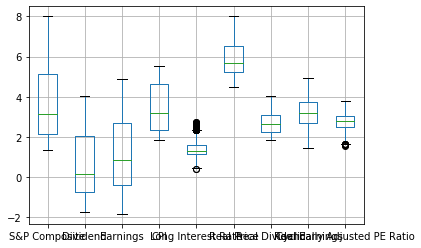

In [23]:
df_transform.boxplot()

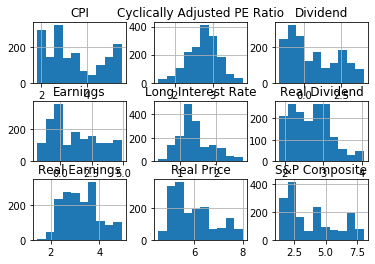

In [26]:
df_transform.hist()
plt.show()

In [42]:
from sklearn.preprocessing import StandardScaler
sc = preprocessing.StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

### splitting data 

In [64]:
x=df.drop(columns='S&P Composite',axis=1)
y=df['S&P Composite']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(1165, 8)
(500, 8)
(500,)


### BASE Model

In [63]:
bm= sm.OLS(y_train, sm.add_constant(x_train)).fit()
bm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          S&P Composite   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 5.350e+04
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        21:51:28   Log-Likelihood:                -5629.4
No. Observations:                1165   AIC:                         1.128e+04
Df Residuals:                    1156   BIC:                         1.132e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          158.1971      5.454     29.008      0.000     147.497     168.897
Dividend                        32.1166      0.884     36.325      0.000      30.382      33.851
Earnings                         4.2266      0.353     11.989      0.000       3.535       4.918
CPI                             -0.9951      0.045    -22.362      0.000      -1.082      -0.908
Long Interest Rate              -3.2374      0.557     -5.815      0.000      -4.330      -2.145
Real Price                       0.6999      0.009     77.354      0.000       0.682       0.718
Real Dividend                  -17.2446      0.621    -27.756      0.000     -18.464     -16.026
Real Earnings                   -1.9934      0.268     -7.436      0.000      -2.519      -1.467
Cyclically Adjusted PE Ratio    -5.9942      0.308    -19.477      0.000      -6.598      -5.390
==============================================================================
Omnibus:                        7.452   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                7.228
Skew:                           0.163   Prob(JB):                       0.0269
Kurtosis:                       2.792   Cond. No.                     5.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
lr = LinearRegression()
lr = lr.fit(x_train,y_train)
print(f'R^2 score for train: {lr.score(x_train, y_train)}')
print(f'R^2 score for test: {lr.score(x_test, y_test)}')

R^2 score for train: 0.997306348401034
R^2 score for test: 0.9973592699003655


### Assumptions 

#### normality of residuals 

In [54]:
stat, p = jarque_bera(bm.resid)

print('Statistics=%.3f, p-value=%.3f' % (stat, p))

Statistics=751.671, p-value=0.000


the rsiduals are not normally distributed 

#### multicollinearity

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=x.columns).T

,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio
vif,158.235164,148.364842,23.711969,9.274308,49.294018,136.093204,168.109358,19.687341


#### linearity of residuals

In [59]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=bm, frac=0.5)

(0.9214276618299353, 0.8373025808123741)

The residuals are linear 

#### homoscedaticity 

In [60]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(bm.resid, bm.model.exog)
lzip(name, test)

[('F statistic', 0.7807196550602211), ('p-value', 0.9984559315280034)]

the residuals are homoscedastic 

### Reducing multicollinearity 

In [69]:
df.head()

,S&P Composite,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio
0,2982.156000,57.220000,132.950000,256.759,1.70,2986.569552,57.304685,133.146764,29.229401
1,2897.498182,56.839092,133.723333,256.558,1.63,2904.059842,56.967809,134.026163,28.705358
2,2996.113636,56.458183,134.496667,256.571,1.63,3002.746469,56.583171,134.794417,29.986685
3,2890.170000,56.077275,135.270000,256.143,2.06,2901.408290,56.295329,135.795991,29.283796
4,2854.710000,55.698183,134.976667,256.092,2.40,2866.381124,55.925898,135.528502,29.242031


In [70]:
df['Dividend/Earnings'] = df['Dividend']/df['Earnings']
df.head()

,S&P Composite,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio,Dividend/Earnings
0,2982.156000,57.220000,132.950000,256.759,1.70,2986.569552,57.304685,133.146764,29.229401,0.430387
1,2897.498182,56.839092,133.723333,256.558,1.63,2904.059842,56.967809,134.026163,28.705358,0.425050
2,2996.113636,56.458183,134.496667,256.571,1.63,3002.746469,56.583171,134.794417,29.986685,0.419774
3,2890.170000,56.077275,135.270000,256.143,2.06,2901.408290,56.295329,135.795991,29.283796,0.414558
4,2854.710000,55.698183,134.976667,256.092,2.40,2866.381124,55.925898,135.528502,29.242031,0.412650


In [77]:
df['Inflation rate'] = df['CPI'].diff()
df['Inflation rate']= df['Inflation rate']*100
df.head()

,S&P Composite,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio,Dividend/Earnings,Inflation rate
0,2982.156000,57.220000,132.950000,256.759,1.70,2986.569552,57.304685,133.146764,29.229401,0.430387,NaN
1,2897.498182,56.839092,133.723333,256.558,1.63,2904.059842,56.967809,134.026163,28.705358,0.425050,-20.1
2,2996.113636,56.458183,134.496667,256.571,1.63,3002.746469,56.583171,134.794417,29.986685,0.419774,1.3
3,2890.170000,56.077275,135.270000,256.143,2.06,2901.408290,56.295329,135.795991,29.283796,0.414558,-42.8
4,2854.710000,55.698183,134.976667,256.092,2.40,2866.381124,55.925898,135.528502,29.242031,0.412650,-5.1


In [80]:
df['% change in price'] = ((df['S&P Composite']-df['Real Price'])/df['Real Price'])*100
df.head()

,S&P Composite,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio,Dividend/Earnings,Inflation rate,% change in price
0,2982.156000,57.220000,132.950000,256.759,1.70,2986.569552,57.304685,133.146764,29.229401,0.430387,NaN,-0.147780
1,2897.498182,56.839092,133.723333,256.558,1.63,2904.059842,56.967809,134.026163,28.705358,0.425050,-20.1,-0.225948
2,2996.113636,56.458183,134.496667,256.571,1.63,3002.746469,56.583171,134.794417,29.986685,0.419774,1.3,-0.220892
3,2890.170000,56.077275,135.270000,256.143,2.06,2901.408290,56.295329,135.795991,29.283796,0.414558,-42.8,-0.387339
4,2854.710000,55.698183,134.976667,256.092,2.40,2866.381124,55.925898,135.528502,29.242031,0.412650,-5.1,-0.407173


In [82]:
df['Real Dividend/Real Earnings'] = df['Real Dividend']/df['Real Earnings']
df.head()

,S&P Composite,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio,Dividend/Earnings,Inflation rate,% change in price,Real Dividend/Real Earnings
0,2982.156000,57.220000,132.950000,256.759,1.70,2986.569552,57.304685,133.146764,29.229401,0.430387,NaN,-0.147780,0.430387
1,2897.498182,56.839092,133.723333,256.558,1.63,2904.059842,56.967809,134.026163,28.705358,0.425050,-20.1,-0.225948,0.425050
2,2996.113636,56.458183,134.496667,256.571,1.63,3002.746469,56.583171,134.794417,29.986685,0.419774,1.3,-0.220892,0.419774
3,2890.170000,56.077275,135.270000,256.143,2.06,2901.408290,56.295329,135.795991,29.283796,0.414558,-42.8,-0.387339,0.414558
4,2854.710000,55.698183,134.976667,256.092,2.40,2866.381124,55.925898,135.528502,29.242031,0.412650,-5.1,-0.407173,0.412650


In [86]:
df['change in D_E'] = df['Dividend/Earnings']- df['Real Dividend/Real Earnings']


In [89]:
df=df.drop(columns='change in D_E',axis=1)
df.head()

,S&P Composite,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio,Dividend/Earnings,Inflation rate,% change in price,Real Dividend/Real Earnings,change in dividends to earnings
0,2982.156000,57.220000,132.950000,256.759,1.70,2986.569552,57.304685,133.146764,29.229401,0.430387,NaN,-0.147780,0.430387,-6.827872e-15
1,2897.498182,56.839092,133.723333,256.558,1.63,2904.059842,56.967809,134.026163,28.705358,0.425050,-20.1,-0.225948,0.425050,6.716849e-15
2,2996.113636,56.458183,134.496667,256.571,1.63,3002.746469,56.583171,134.794417,29.986685,0.419774,1.3,-0.220892,0.419774,-5.051515e-15
3,2890.170000,56.077275,135.270000,256.143,2.06,2901.408290,56.295329,135.795991,29.283796,0.414558,-42.8,-0.387339,0.414558,3.774758e-15
4,2854.710000,55.698183,134.976667,256.092,2.40,2866.381124,55.925898,135.528502,29.242031,0.412650,-5.1,-0.407173,0.412650,-6.383782e-15


### dropping columns 

In [91]:
df1 = adf.drop(columns=['Dividend','Earnings','Real Dividend','Real Earnings','Dividend/Earnings','Real Dividend/Real Earnings'],axis=1)
df1.head()

,S&P Composite,CPI,Long Interest Rate,Real Price,Cyclically Adjusted PE Ratio,Inflation rate,% change in price,change in dividends to earnings
0,2982.156000,256.759,1.70,2986.569552,29.229401,NaN,-0.147780,-6.827872e-15
1,2897.498182,256.558,1.63,2904.059842,28.705358,-20.1,-0.225948,6.716849e-15
2,2996.113636,256.571,1.63,3002.746469,29.986685,1.3,-0.220892,-5.051515e-15
3,2890.170000,256.143,2.06,2901.408290,29.283796,-42.8,-0.387339,3.774758e-15
4,2854.710000,256.092,2.40,2866.381124,29.242031,-5.1,-0.407173,-6.383782e-15


In [93]:
df1['Inflation rate']=df1['Inflation rate'].fillna(0)

In [99]:
df1=df1.d0rop(columns=['CPI','Real Price'],axis=1)

### Building model with transformed features 

In [100]:
x=df1.drop(columns='S&P Composite',axis=1)
y=df1['S&P Composite']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(1165, 5)
(500, 5)
(500,)


In [101]:
bm= sm.OLS(y_train, sm.add_constant(x_train)).fit()
bm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          S&P Composite   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     2832.
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        22:33:20   Log-Likelihood:                -7691.7
No. Observations:                1165   AIC:                         1.539e+04
Df Residuals:                    1160   BIC:                         1.542e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            1709.5895     37.490     45.601      0.000    1636.034    1783.145
Long Interest Rate                -55.1859      2.509    -21.996      0.000     -60.108     -50.264
Cyclically Adjusted PE Ratio       10.7337      1.008     10.646      0.000       8.756      12.712
Inflation rate                      0.0380      0.148      0.256      0.798      -0.253       0.329
% change in price                  17.7666      0.242     73.553      0.000      17.293      18.240
change in dividends to earnings  6.776e-15   2.97e-16     22.807      0.000    6.19e-15    7.36e-15
==============================================================================
Omnibus:                      493.889   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4795.442
Skew:                           1.690   Prob(JB):                         0.00
Kurtosis:                      12.347   Cond. No.                     5.87e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.32e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=x.columns).T

,Long Interest Rate,Cyclically Adjusted PE Ratio,Inflation rate,% change in price,change in dividends to earnings
vif,3.972162,3.431056,1.403449,3.741454,1.001972


#### multi collinearity is handled 

In [179]:
lr = LinearRegression()
lr = lr.fit(x_train,y_train)
print(f'R^2 score for train: {lr.score(x_train, y_train)}')
print(f'R^2 score for test: {lr.score(x_test, y_test)}')

R^2 score for train: 0.9072086631571407
R^2 score for test: 0.8999347303188499


In [180]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)

rmse = np.sqrt(mse)

rsquared = r2_score(y_test,y_pred)

cols = ['Model', 'R-Squared','MSE','RMSE']

# creating a empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
metrics = pd.Series({'Model': "Linear regression base model",'R-Squared': rsquared,'MSE':mse,'RMSE':rmse,})

# appending our result table
result_tabulation = result_tabulation.append(metrics, ignore_index = True)

# view the result table
result_tabulation


,Model,R-Squared,MSE,RMSE
0,Linear regression base model,0.899935,33678.040107,183.515776


### Linear regression with log transformed target variable 

In [181]:
y_trans= y.apply(lambda x: np.log(x))

In [182]:
x=df1.drop(columns='S&P Composite',axis=1)
y=df1['S&P Composite']
x_train,x_test,y_train,y_test=train_test_split(x,y_trans,test_size=0.30,random_state=2)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(1165, 5)
(500, 5)
(500,)


In [183]:
lr = LinearRegression()
lr = lr.fit(x_train,y_train)
print(f'R^2 score for train: {lr.score(x_train, y_train)}')
print(f'R^2 score for test: {lr.score(x_test, y_test)}')

y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)

rmse = np.sqrt(mse)

rsquared = r2_score(y_test,y_pred)

metrics = pd.Series({'Model': "Linear regression with log transfomed target ",'R-Squared': rsquared,'MSE':mse,'RMSE':rmse,})

# appending our result table
result_tabulation = result_tabulation.append(metrics, ignore_index = True)

# view the result table
result_tabulation


R^2 score for train: 0.919952036785344
R^2 score for test: 0.9266307887795591


,Model,R-Squared,MSE,RMSE
0,Linear regression base model,0.899935,33678.040107,183.515776
1,Linear regression with log transfomed target,0.926631,0.291066,0.539505


In [184]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(1165, 5)
(500, 5)
(500,)


### Feature importance 

In [185]:
linreg_full_model_withoutlog = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# print the summary output
print(linreg_full_model_withoutlog.summary())

                            OLS Regression Results                            
Dep. Variable:          S&P Composite   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     2832.
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        23:32:56   Log-Likelihood:                -7691.7
No. Observations:                1165   AIC:                         1.539e+04
Df Residuals:                    1160   BIC:                         1.542e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [186]:
# Calculate the p-values for all the variables
linreg_full_model_withoutlog_pvalues = pd.DataFrame(linreg_full_model_withoutlog.pvalues, columns = ["P-Value"])

# print the values
linreg_full_model_withoutlog_pvalues

,P-Value
const,5.964565e-261
Long Interest Rate,6.628645e-90
Cyclically Adjusted PE Ratio,2.570344e-25
Inflation rate,7.981830e-01
% change in price,0.000000e+00
change in dividends to earnings,2.024752e-95


In [187]:
insignificant_variables =linreg_full_model_withoutlog_pvalues[linreg_full_model_withoutlog_pvalues['P-Value'] > 0.05]
# to get the position of a specified value
insigni_var = insignificant_variables.index
# convert the list of variables to 'list' type
insigni_var = insigni_var.to_list()

In [188]:
insigni_var

['Inflation rate']

### Linear regression with important features and log target variable 

In [189]:
x_imp_feature=x.drop(columns='Inflation rate',axis=1)
x_imp_feature.head()

,Long Interest Rate,Cyclically Adjusted PE Ratio,% change in price,change in dividends to earnings
0,1.70,29.229401,-0.147780,-6.827872e-15
1,1.63,28.705358,-0.225948,6.716849e-15
2,1.63,29.986685,-0.220892,-5.051515e-15
3,2.06,29.283796,-0.387339,3.774758e-15
4,2.40,29.242031,-0.407173,-6.383782e-15


In [190]:
x_train,x_test,y_train,y_test=train_test_split(x_imp_feature,y_trans,test_size=0.30,random_state=2)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(1165, 4)
(500, 4)
(500,)


In [191]:
lr = LinearRegression()
lr = lr.fit(x_train,y_train)
print(f'R^2 score for train: {lr.score(x_train, y_train)}')
print(f'R^2 score for test: {lr.score(x_test, y_test)}')

y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)

rmse = np.sqrt(mse)

rsquared = r2_score(y_test,y_pred)

metrics = pd.Series({'Model': "Linear regression with imp-features and log y",'R-Squared': rsquared,'MSE':mse,'RMSE':rmse,})

# appending our result table
result_tabulation = result_tabulation.append(metrics, ignore_index = True)

# view the result table
result_tabulation


R^2 score for train: 0.9200086825250191
R^2 score for test: 0.9263508358603085


,Model,R-Squared,MSE,RMSE
0,Linear regression base model,0.899935,33678.040107,183.515776
1,Linear regression with log transfomed target,0.926631,0.291066,0.539505
2,Linear regression with imp-features and log y,0.926351,0.292176,0.540534


### Linear regression with RFE

In [192]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [193]:
#no of features
nof_list=np.arange(1,6)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(x,y_trans, test_size = 0.3, random_state = 2)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 5
Score with 5 features: 0.926631


### Ridge regression 

In [197]:
x_train, x_test, y_train, y_test = train_test_split(x,y_trans, test_size = 0.3, random_state = 2)
lr = LinearRegression()
lr.fit(x_train, y_train)
rr = Ridge(alpha=0.01) 
rr.fit(x_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [198]:
print(f'R^2 score for train: {rr.score(x_train, y_train)}')
print(f'R^2 score for test: {rr.score(x_test, y_test)}')

y_pred = rr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)

rmse = np.sqrt(mse)

rsquared = r2_score(y_test,y_pred)

metrics = pd.Series({'Model': "ridge regression",'R-Squared': rsquared,'MSE':mse,'RMSE':rmse,})

# appending our result table
result_tabulation = result_tabulation.append(metrics, ignore_index = True)

# view the result table
result_tabulation

R^2 score for train: 0.9201099212999614
R^2 score for test: 0.9267428505763287


,Model,R-Squared,MSE,RMSE
0,Linear regression base model,0.899935,33678.040107,183.515776
1,Linear regression with log transfomed target,0.926631,0.291066,0.539505
2,Linear regression with imp-features and log y,0.926351,0.292176,0.540534
3,ridge regression,0.926743,0.290621,0.539093


### Ridge with Grid search 

In [201]:
from sklearn.model_selection import GridSearchCV

lambdas=np.linspace(1,100,100)
params={'alpha':lambdas}
rr_grid =Ridge(fit_intercept=True)
grid_search=GridSearchCV(rr_grid,param_grid=params,cv=10,scoring='neg_mean_absolute_error')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35....,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])},
             pre_dispatch='2*n

In [202]:
grid_search.best_estimator_

Ridge(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [203]:
y_pred=grid_search.predict(x_test)

print(f'R^2 score for train: {rr.score(x_train, y_train)}')
print(f'R^2 score for test: {rr.score(x_test, y_test)}')

mse = mean_squared_error(y_test,y_pred)

rmse = np.sqrt(mse)

rsquared = r2_score(y_test,y_pred)

metrics = pd.Series({'Model': "ridge regression with gridsearch ",'R-Squared': rsquared,'MSE':mse,'RMSE':rmse,})

# appending our result table
result_tabulation = result_tabulation.append(metrics, ignore_index = True)

# view the result table
result_tabulation

R^2 score for train: 0.9201099212999614
R^2 score for test: 0.9267428505763287


,Model,R-Squared,MSE,RMSE
0,Linear regression base model,0.899935,33678.040107,183.515776
1,Linear regression with log transfomed target,0.926631,0.291066,0.539505
2,Linear regression with imp-features and log y,0.926351,0.292176,0.540534
3,ridge regression,0.926743,0.290621,0.539093
4,ridge regression with gridsearch,0.926787,0.290448,0.538932


### Lasso regression with grid search 

In [204]:
lasso_grid =Lasso(fit_intercept=True)
grid_search=GridSearchCV(lasso_grid,param_grid=params,cv=10,scoring='neg_mean_absolute_error')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21....
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       10

In [205]:
grid_search.best_estimator_

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [206]:
y_pred=grid_search.predict(x_test)

print(f'R^2 score for train: {rr.score(x_train, y_train)}')
print(f'R^2 score for test: {rr.score(x_test, y_test)}')

mse = mean_squared_error(y_test,y_pred)

rmse = np.sqrt(mse)

rsquared = r2_score(y_test,y_pred)

metrics = pd.Series({'Model': "Lasso regression with gridsearch ",'R-Squared': rsquared,'MSE':mse,'RMSE':rmse,})

# appending our result table
result_tabulation = result_tabulation.append(metrics, ignore_index = True)

# view the result table
result_tabulation

R^2 score for train: 0.9201099212999614
R^2 score for test: 0.9267428505763287


,Model,R-Squared,MSE,RMSE
0,Linear regression base model,0.899935,33678.040107,183.515776
1,Linear regression with log transfomed target,0.926631,0.291066,0.539505
2,Linear regression with imp-features and log y,0.926351,0.292176,0.540534
3,ridge regression,0.926743,0.290621,0.539093
4,ridge regression with gridsearch,0.926787,0.290448,0.538932
5,Lasso regression with gridsearch,0.894626,0.418034,0.646555


### desicion tree regressor 

In [208]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [209]:
y_pred=regressor.predict(x_test)

print(f'R^2 score for train: {regressor.score(x_train, y_train)}')
print(f'R^2 score for test: {regressor.score(x_test, y_test)}')

mse = mean_squared_error(y_test,y_pred)

rmse = np.sqrt(mse)

rsquared = r2_score(y_test,y_pred)

metrics = pd.Series({'Model': "Desicion tree regressor",'R-Squared': rsquared,'MSE':mse,'RMSE':rmse,})

# appending our result table
result_tabulation = result_tabulation.append(metrics, ignore_index = True)

# view the result table
result_tabulation

R^2 score for train: 0.9454679144594439
R^2 score for test: 0.94825640391578


,Model,R-Squared,MSE,RMSE
0,Linear regression base model,0.899935,33678.040107,183.515776
1,Linear regression with log transfomed target,0.926631,0.291066,0.539505
2,Linear regression with imp-features and log y,0.926351,0.292176,0.540534
3,ridge regression,0.926743,0.290621,0.539093
4,ridge regression with gridsearch,0.926787,0.290448,0.538932
5,Lasso regression with gridsearch,0.894626,0.418034,0.646555
6,Desicion tree regressor,0.948256,0.205274,0.453072


### Random forest regressor 

In [211]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(max_depth=2)
regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [215]:
y_pred=regressor.predict(x_test)

print(f'R^2 score for train: {regressor.score(x_train, y_train)}')
print(f'R^2 score for test: {regressor.score(x_test, y_test)}')

mse = mean_squared_error(y_test,y_pred)

rmse = np.sqrt(mse)

rsquared = r2_score(y_test,y_pred)

metrics = pd.Series({'Model': "Random forest regressor",'R-Squared': rsquared,'MSE':mse,'RMSE':rmse,})

# appending our result table
result_tabulation = result_tabulation.append(metrics, ignore_index = True)

# view the result table
result_tabulation

R^2 score for train: 0.9536187411076179
R^2 score for test: 0.9561373938384067


,Model,R-Squared,MSE,RMSE
0,Linear regression base model,0.899935,33678.040107,183.515776
1,Linear regression with log transfomed target,0.926631,0.291066,0.539505
2,Linear regression with imp-features and log y,0.926351,0.292176,0.540534
3,ridge regression,0.926743,0.290621,0.539093
4,ridge regression with gridsearch,0.926787,0.290448,0.538932
5,Lasso regression with gridsearch,0.894626,0.418034,0.646555
6,Desicion tree regressor,0.948256,0.205274,0.453072
7,Random forest regressor,0.956137,0.174009,0.417144
